Primera pasada en Power Bi

La tabla contiene registros para cada llamada entrante al call center.



Descripción de estructura y contenido de la tabla:
Inicialmente nos encontramos con 444448 registros.
No hay valores nulos o faltantes para ningún campo.

Exploración de campos


    * vru.line: identifica la vru (Voice Response Unit ) y la línea de entrada. Hay 2 VRU AA01 y AA02, con 16 líneas cada una, numeradas del 1 al 16.

    * call_id: identifica la llamada como número, teniendo valores entre 10000 y 10200. Los call_id no son valores únicos. Para distintos valores de vru.line se observan valores repetidos de call_id (por ejemplo, vru.line para AA01 y AA02 existe el call_id 10000)

    * customer_id: identifica al cliente, siendo 0 para llamadas en las que no se identificó el cliente.

    * priority: 0 para clientes no idenfiticados, 1 para clientes regulares, 2 para clientes prioritarios. 
    Hay registros de clientes identificador (o sea, con un numero de customer_id) que tienen priority 0. Para estos casos se debera modificar los valores por 1.

    * type: identifica el tipo de servicio. Se detectan 2 inconsistencias. 
    Primero, se detectan 6 registros donde type TT tiene un espacio en blanco adelante, por lo que lo cuenta como otro tipo de servicio. Se eliminan los espacios en blanco para unificar las categorias.
    Segundo, se identifica el valor AA que no corresponde a ninguno de los 6 tipos de servicio que presta el call center. Existen 5 registros para type AA los cuales son eliminados al ser despreciables para la muestra. 


    * outcome: refiere al resultado de la llamada. No se identifican inconsistencias.

    * server: refiere al agente que atiende la llamada conteniendo como valor solo su nombre. En caso que la llamada no llegue a la instancia de atención por un agente, el valor será NO_SERVER.
    Se detectan varias inconsistencias que se corrigen.
    Por un lado, se encuentran campos con valores ANO_SERVERT, NO_SERVERAMA. Se modifican a NO_SERVER.
    Por otro lado, se encuentran nombres de agentes que comienzan con Z1 y Z2 que son corregidos. 
    Adicionalmente, se observan valores muy similares que se entiende pueden deberse a errores tipográficos o diminutivos del nombre (ASAF, ASSAF, AVI, AVIDAN, AVNI, ELI, ELINOR y otros ejemplos).
    Se observa también un valor EXPRESS para el cual existen 3 registros.
    Para analizar el rendimiento de los agentes se deberá definir qué hacer con estos registros y corregir lo necesario.
    A efectos del presente análisis no se realizarán más correcciones por el momento en este campo.




Campos temporales
Nos encontramos con distintos registros referidos a la temporalidad. 
El campo date refiere a la fecha de la llamada. 
Se observan 9 campos referidos a las distintas instancias de atención desde que ingresa la llamada hasta su finalización.
Dichas instancias son la VRU (vru_), la cola de espera (q_) y el servicio brindado por un agente (ser_). 
Para cada instancia (VRU, cola de espera, servicio) se cuenta con 3 campos que identifican el ingreso, el egreso y el tiempo transcurrido.  
Los valores de ingreso y egreso se expresa en formato de horas:minutos:segundos.
El valor de tiempo corresponde a el tiempo de egreso menos el de ingreso para cada instancia, expresandose como segundos.
Se modifica el nombre del campo vru_entry por vru_start para normalizar la nomenclatura de los campos.
De esta forma nos queda para cada instancia del servicio (vru, q, ser) los campos _start, _exit y _time.

Se observan algunas inconsistencias en los datos al traer valores mínimos y máximos para vru_time, q_time y ser_time.
En los 3 casos se observan valores máximos que aparentemente son outliers (por encima de 1 hora hasta mas de 1000 horas). Se deberá profundizar la exploración para determinar cuántos registros contienen estos valores atípicos y cómo procesarlos.
En el caso de vru_time se observan 350 valores negativos, que no podría ser el caso para el tiempo de servicio. 
Se observa para estos casos que los valores de vru_start y vru_exit se encuentran invertidos, lo cual deberá ser corregido.

Nos encontramos con otro campo de temporalidad, startdate, que contiene como valor el número del día del año que corresponde al inicio del mes al que refiere cada llamada. Se considera innecesario este dato por lo cual se elimina.






Observaciones iniciales
- Valores repetidos en call_id. Como buena práctica esta tabla debería tener valores únicos para cada registro. 


Se realizan cambios de tipos de datos de algunos campos:
- Date a tipo fecha.
- Los campos call_id, customer_id y priority a tipo número entero.
- Los campos referidos a tiempo (los que tienen prefijos vru_, q_ y ser_) a tipo tiempo.
- 


Quedan 444443 registros.

se genera nuevo call id


Llamadas total time 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [46]:
df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=';')
df

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\130550806.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet_RAW.csv', sep=';')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [ ]:
df.info()
df.shape

In [ ]:
df.columns

In [ ]:
df.describe()


In [47]:
# Eliminar la columna 'startdate'
df.drop('startdate', axis=1, inplace=True)


In [48]:

# Eliminar filas donde 'outcome' es igual a 'PHANTOM' o 'type' es igual a 'AA'
df = df[(df['outcome'] != 'PHANTOM') & (df['type'] != 'AA')]


In [49]:

# Reemplazar valores en las columnas 'type' y 'server'
df['type'] = df['type'].str.strip()  # Eliminar espacios en blanco iniciales y finales en 'type'
df['server'].replace({'ANO_SERVERT': 'NO_SERVER', 'NO_SERVERAMA': 'NO_SERVER'}, inplace=True)
df['server'] = df['server'].str.lstrip('Z1Z2')


C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2909162857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].str.strip()  # Eliminar espacios en blanco iniciales y finales en 'type'
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2909162857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['server'].replace({'ANO_SERVERT': 'NO_SERVER', 'NO_SERVERAMA': 'NO_SERVER'}, inplace=True)
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2909162857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [50]:
# Mostrar valores únicos en la columna 'server'
unique_servers = df['server'].unique()

# Imprimir los valores únicos
print(unique_servers)


['NO_SERVER' 'MICHAL' 'BASCH' 'KAZAV' 'VICKY' 'YITZ' 'SHARON' 'MORIAH'
 'OHARI' 'AVNI' 'PINHAS' 'GILI' 'TALI' 'YIFAT' 'LORI' 'TOVA' 'ELI' 'MIKI'
 'NAAMA' 'ANAT' 'IDIT' 'DORIT' 'SHLOMO' 'BENSION' 'GELBER' 'AVIDAN'
 'DARMON' 'EXPRESS' 'DAVID' 'STEREN' 'ROTH' 'AVI' 'MEIR' 'GOLDIE' 'LIOR'
 'OFER' 'IFAT' 'EYAL' 'ARIE' 'NIRIT' 'ELINOR' 'OFERZ' 'IPI' 'SPIEGEL'
 'ASAF' 'BRUHI' 'MOTI' 'ASSAF' 'MOSHE']


In [ ]:
'''
# Convertir 'customer_id' a tipo 'string'
df['customer_id'] = df['customer_id'].astype('string')
customer_id_auxiliar = df['customer_id'].str.replace('.', '',)
# customer_id_auxiliar = df['customer_id']

# Iterar sobre las filas
for i, valor in enumerate(customer_id_auxiliar):
    # Verificar si la longitud es mayor a 12
    if len(valor) > 12:
        # Truncar a los primeros 12 caracteres
        primeros_12_caracteres = valor[:12]
        # Actualizar el valor en customer_id_auxiliar
        customer_id_auxiliar.iloc[i] = primeros_12_caracteres

# Verificar los cambios en customer_id_auxiliar
print(customer_id_auxiliar.head())

df['customer_id'] = customer_id_auxiliar
df['customer_id'] = df['customer_id'].str[:12]

customer_id_lista = df['customer_id'].str[:12].tolist()
df['customer_id_nueva'] = customer_id_lista
'''

'''
df['customer_id'] = df['customer_id'].replace('.', '', regex=False)
df['customer_id'] = df['customer_id'].replace('+', '', regex=False)
df['customer_id'] = df['customer_id'].str[:12]
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce')

# Lidiar con valores no finitos (por ejemplo, reemplazar NaN con un valor específico)
df['customer_id'].fillna(valor_especifico, inplace=True)

# Convertir 'customer_id' a tipo entero
df['customer_id'] = df['customer_id'].astype(int)
df['customer_id'] = df['customer_id'].astype(float).astype(int)

# Eliminar caracteres "0" desde la derecha en customer_id
df['customer_id'] = df['customer_id'].apply(lambda x: str(int(float(x))) if '.' in x else x)
'''

In [ ]:

df['customer_id'] = df['customer_id'].astype('string')
customer_id_auxiliar = df['customer_id'].str.replace('.', '') #, regex=False).str[:12].tolist()
df['customer_id'] = customer_id_auxiliar
df['customer_id'] = df['customer_id'].astype('string')
df['customer_id'] = df['customer_id'].str[:12]


In [51]:
# Definir una función para asignar niveles de prioridad
def assign_priority_level(priority):
    if priority in [0, 1]:
        return "REGULAR"
    elif priority == 2:
        return "HIGH"
    

# Aplicar la función a la columna 'priority' para crear 'priority_level'
df['priority_level'] = df['priority'].apply(assign_priority_level)

# Verificar los cambios en el DataFrame
print(df[['priority', 'priority_level']])


        priority priority_level
0              2           HIGH
1              0        REGULAR
2              2           HIGH
3              0        REGULAR
4              0        REGULAR
...          ...            ...
444443         0        REGULAR
444444         0        REGULAR
444445         0        REGULAR
444446         0        REGULAR
444447         0        REGULAR

[440844 rows x 2 columns]


C:\Users\matia\AppData\Local\Temp\ipykernel_25368\1690419475.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['priority_level'] = df['priority'].apply(assign_priority_level)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440844 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   vru.line        440844 non-null  object
 1   call_id         440844 non-null  int64 
 2   customer_id     440844 non-null  object
 3   priority        440844 non-null  int64 
 4   type            440844 non-null  object
 5   date            440844 non-null  object
 6   vru_entry       440844 non-null  object
 7   vru_exit        440844 non-null  object
 8   vru_time        440844 non-null  int64 
 9   q_start         440844 non-null  object
 10  q_exit          440844 non-null  object
 11  q_time          440844 non-null  int64 
 12  outcome         440844 non-null  object
 13  ser_start       440844 non-null  object
 14  ser_exit        440844 non-null  object
 15  ser_time        440844 non-null  int64 
 16  server          440844 non-null  object
 17  priority_level  440844 non-null  o

In [53]:
# Cambiar tipos de datos
df['vru.line'] = df['vru.line'].astype('string')
df['call_id'] = df['call_id'].astype('string')
df['priority'] = df['priority'].astype('category')
df['type'] = df['type'].astype('category')
df['date'] = pd.to_datetime(df['date'])
df['vru_entry'] = pd.to_datetime(df['vru_entry'], format='%H:%M:%S').dt.time
df['vru_exit'] = pd.to_datetime(df['vru_exit'], format='%H:%M:%S').dt.time
df['q_start'] = pd.to_datetime(df['q_start'], format='%H:%M:%S').dt.time
df['q_exit'] = pd.to_datetime(df['q_exit'], format='%H:%M:%S').dt.time
df['outcome'] = df['outcome'].astype('category')
df['ser_start'] = pd.to_datetime(df['ser_start'], format='%H:%M:%S').dt.time
df['ser_exit'] = pd.to_datetime(df['ser_exit'], format='%H:%M:%S').dt.time
df['server'] = df['server'].astype('category')
df['priority_level'] = df['server'].astype('category')

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\3309599796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vru.line'] = df['vru.line'].astype('string')
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\3309599796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_id'] = df['call_id'].astype('string')
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\3309599796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [54]:
# Verificar los cambios
df.dtypes

vru.line          string[python]
call_id           string[python]
customer_id               object
priority                category
type                    category
date              datetime64[ns]
vru_entry                 object
vru_exit                  object
vru_time                   int64
q_start                   object
q_exit                    object
q_time                     int64
outcome                 category
ser_start                 object
ser_exit                  object
ser_time                   int64
server                  category
priority_level          category
dtype: object

In [ ]:
df.head()

In [55]:
# Concatenar vru.line y call_id con un guion en el medio y reemplazar valores en call_id
df['call_id'] = df['vru.line'] + '-' + df['call_id']


C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2492129406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_id'] = df['vru.line'] + '-' + df['call_id']


In [ ]:
df.head()

In [56]:
# Renombrar la columna vru_entry a vru_start
df.rename(columns={'vru_entry': 'vru_start'}, inplace=True)

# Intercambiar valores en vru_start y vru_exit si vru_start > vru_exit
mask = df['vru_start'] > df['vru_exit']
df.loc[mask, ['vru_start', 'vru_exit']] = df.loc[mask, ['vru_exit', 'vru_start']].values

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\4141965220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'vru_entry': 'vru_start'}, inplace=True)


In [ ]:
df.info()

In [57]:
# Filtrar las filas donde ser_start y ser_exit son '00:00:00'
filtered_rows = df[(df['ser_start'].astype(str) == '00:00:00') & (df['ser_exit'].astype(str) == '00:00:00') & (df['outcome'] == 'AGENT')]

# Mostrar las columnas ser_start, ser_exit y outcome para las filas filtradas
result = filtered_rows[['ser_start', 'ser_exit', 'outcome']]

# Imprimir el resultado
print(result)

       ser_start  ser_exit outcome
712     00:00:00  00:00:00   AGENT
2193    00:00:00  00:00:00   AGENT
3095    00:00:00  00:00:00   AGENT
3097    00:00:00  00:00:00   AGENT
3283    00:00:00  00:00:00   AGENT
...          ...       ...     ...
441774  00:00:00  00:00:00   AGENT
442737  00:00:00  00:00:00   AGENT
443388  00:00:00  00:00:00   AGENT
443943  00:00:00  00:00:00   AGENT
443973  00:00:00  00:00:00   AGENT

[553 rows x 3 columns]


In [58]:
# Suponiendo que ser_start y ser_exit son de tipo datetime.time
mask = (df['ser_start'].apply(lambda x: x.strftime('%H:%M:%S')) == '00:00:00') & (df['ser_exit'].apply(lambda x: x.strftime('%H:%M:%S')) == '00:00:00')

# Asignar 'HANG' a la columna outcome en las filas que cumplen la condición
df.loc[mask, 'outcome'] = 'HANG'

# Verificar los cambios
print(df.head())


  vru.line       call_id customer_id priority type       date vru_start  \
0   AA0101  AA0101-33116   9664491.0        2   PS 1999-01-01  00:00:31   
1   AA0101  AA0101-33117         0.0        0   PS 1999-01-01  00:34:12   
2   AA0101  AA0101-33118  27997683.0        2   PS 1999-01-01  06:55:20   
3   AA0101  AA0101-33119         0.0        0   PS 1999-01-01  07:41:16   
4   AA0101  AA0101-33120         0.0        0   PS 1999-01-01  08:03:14   

   vru_exit  vru_time   q_start    q_exit  q_time outcome ser_start  ser_exit  \
0  00:00:36         5  00:00:36  00:03:09     153    HANG  00:00:00  00:00:00   
1  00:34:23        11  00:00:00  00:00:00       0    HANG  00:00:00  00:00:00   
2  06:55:26         6  06:55:26  06:55:43      17   AGENT  06:55:43  06:56:37   
3  07:41:26        10  00:00:00  00:00:00       0   AGENT  07:41:25  07:44:53   
4  08:03:24        10  00:00:00  00:00:00       0   AGENT  08:03:23  08:05:10   

   ser_time     server priority_level  
0         0  NO_SERVER

In [59]:
# Filtrar las filas donde ser_start y ser_exit son '00:00:00'
filtered_rows = df[(df['ser_start'].astype(str) == '00:00:00') & (df['ser_exit'].astype(str) == '00:00:00') & (df['outcome'] == 'AGENT')]

# Mostrar las columnas ser_start, ser_exit y outcome para las filas filtradas
result = filtered_rows[['ser_start', 'ser_exit', 'outcome']]

# Imprimir el resultado
print(result)

Empty DataFrame
Columns: [ser_start, ser_exit, outcome]
Index: []


In [ ]:
df.info()

In [60]:
df2 = df

In [ ]:
#df = df2

In [61]:

#from datetime import datetime

# Aplicar el cálculo de diferencia de tiempo a todas las filas
df['vru_time_calc'] = (df.apply(lambda row: (datetime.combine(datetime.min, row['vru_exit']) - datetime.combine(datetime.min, row['vru_start'])).total_seconds(), axis=1))

# Verificar los cambios en el DataFrame
# print(df[['vru_start', 'vru_exit', 'vru_time_calc']])

''' 

# Aplicar el cálculo de diferencia de tiempo a todas las filas
df['q_time_calc'] = df.apply(lambda row: (datetime.combine(datetime.min, row['q_exit']) - datetime.combine(datetime.min, row['q_start'])).total_seconds(), axis=1)

# Verificar los cambios en el DataFrame
print(df[['q_start', 'q_exit', 'q_time_calc']])



# Aplicar el cálculo de diferencia de tiempo a todas las filas
df['ser_time_calc'] = df.apply(lambda row: (datetime.combine(datetime.min, row['ser_exit']) - datetime.combine(datetime.min, row['ser_start'])).total_seconds(), axis=1)

# Verificar los cambios en el DataFrame
print(df[['ser_start', 'ser_exit', 'ser_time_calc']])

'''

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\1475664991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vru_time_calc'] = (df.apply(lambda row: (datetime.combine(datetime.min, row['vru_exit']) - datetime.combine(datetime.min, row['vru_start'])).total_seconds(), axis=1))


" \n\n# Aplicar el cálculo de diferencia de tiempo a todas las filas\ndf['q_time_calc'] = df.apply(lambda row: (datetime.combine(datetime.min, row['q_exit']) - datetime.combine(datetime.min, row['q_start'])).total_seconds(), axis=1)\n\n# Verificar los cambios en el DataFrame\nprint(df[['q_start', 'q_exit', 'q_time_calc']])\n\n\n\n# Aplicar el cálculo de diferencia de tiempo a todas las filas\ndf['ser_time_calc'] = df.apply(lambda row: (datetime.combine(datetime.min, row['ser_exit']) - datetime.combine(datetime.min, row['ser_start'])).total_seconds(), axis=1)\n\n# Verificar los cambios en el DataFrame\nprint(df[['ser_start', 'ser_exit', 'ser_time_calc']])\n\n"

In [ ]:
'''
# Función personalizada para calcular la diferencia de tiempo bajo condiciones
def calcular_diferencia(row):
    if row['vru_start'] <= row['vru_exit']:
        return ((datetime.combine(datetime.min, row['vru_exit']) - datetime.combine(datetime.min, row['vru_start'])).total_seconds())/10
    else:
        return (864000 + (datetime.combine(datetime.min, row['vru_exit']) - datetime.combine(datetime.min, row['vru_start'])).total_seconds()) / 10

# Aplicar la función a todas las filas
df['vru_time_calc'] = df.apply(calcular_diferencia, axis=1)


# Verificar los cambios en el DataFrame
print(df[['vru_start', 'vru_exit', 'vru_time_calc']])
'''

In [62]:

# Función personalizada para calcular la diferencia de tiempo bajo condiciones
def calcular_diferencia(row):
    if row['q_start'] <= row['q_exit']:
        return ((datetime.combine(datetime.min, row['q_exit']) - datetime.combine(datetime.min, row['q_start'])).total_seconds())
    else:
        return ((datetime.combine(datetime.min, row['q_exit']) - datetime.combine(datetime.min, row['q_start'])).total_seconds() + 86400)

# Aplicar la función a todas las filas
df['q_time_calc'] = df.apply(calcular_diferencia, axis=1)

# Restar 150 a 'q_time_calc' para registros con 'priority' igual a 2
df.loc[df['priority'] == 2, 'q_time_calc'] -= 90

# Establecer un límite mínimo de 0 para 'q_time_calc'
df['q_time_calc'] = df['q_time_calc'].apply(lambda x: max(x, 0))


'''
# Aplicar cambios adicionales según tu condición
#df.loc[df['q_start'] > df['q_exit'], 'q_time_calc'] = 86400 - df['q_time_calc']

# Verificar los cambios en el DataFrame
print(df[['q_start', 'q_exit', 'q_time_calc']])
'''

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\363305223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['q_time_calc'] = df.apply(calcular_diferencia, axis=1)
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\363305223.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['q_time_calc'] = df['q_time_calc'].apply(lambda x: max(x, 0))


"\n# Aplicar cambios adicionales según tu condición\n#df.loc[df['q_start'] > df['q_exit'], 'q_time_calc'] = 86400 - df['q_time_calc']\n\n# Verificar los cambios en el DataFrame\nprint(df[['q_start', 'q_exit', 'q_time_calc']])\n"

In [63]:
# Función personalizada para calcular la diferencia de tiempo bajo condiciones
def calcular_diferencia(row):
    if row['ser_start'] <= row['ser_exit']:
        return ((datetime.combine(datetime.min, row['ser_exit']) - datetime.combine(datetime.min, row['ser_start'])).total_seconds())
    else:
        return ((datetime.combine(datetime.min, row['ser_exit']) - datetime.combine(datetime.min, row['ser_start'])).total_seconds() + 86400)

# Aplicar la función a todas las filas
df['ser_time_calc'] = df.apply(calcular_diferencia, axis=1)


# Verificar los cambios en el DataFrame
# print(df[['ser_start', 'ser_exit', 'ser_time_calc']])



C:\Users\matia\AppData\Local\Temp\ipykernel_25368\4211033610.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ser_time_calc'] = df.apply(calcular_diferencia, axis=1)


In [64]:
df['q_time_calc'] = df['q_time_calc'].astype('int')

df['vru_time_calc'] = df['vru_time_calc'].astype('int')

df['ser_time_calc'] = df['ser_time_calc'].astype('int')

df.loc[df['ser_time_calc'] == 0, 'server'] = "NO_SERVER"
df.loc[df['ser_time_calc'] == 0, 'outcome'] = "HANG"

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2475064759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['q_time_calc'] = df['q_time_calc'].astype('int')
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2475064759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vru_time_calc'] = df['vru_time_calc'].astype('int')
C:\Users\matia\AppData\Local\Temp\ipykernel_25368\2475064759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [65]:

df['total_time'] = df['vru_time_calc'] + df['q_time_calc'] + df['ser_time_calc']

df.info()

C:\Users\matia\AppData\Local\Temp\ipykernel_25368\1437680434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_time'] = df['vru_time_calc'] + df['q_time_calc'] + df['ser_time_calc']


<class 'pandas.core.frame.DataFrame'>
Index: 440844 entries, 0 to 444447
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   vru.line        440844 non-null  string        
 1   call_id         440844 non-null  string        
 2   customer_id     440844 non-null  object        
 3   priority        440844 non-null  category      
 4   type            440844 non-null  category      
 5   date            440844 non-null  datetime64[ns]
 6   vru_start       440844 non-null  object        
 7   vru_exit        440844 non-null  object        
 8   vru_time        440844 non-null  int64         
 9   q_start         440844 non-null  object        
 10  q_exit          440844 non-null  object        
 11  q_time          440844 non-null  int64         
 12  outcome         440844 non-null  category      
 13  ser_start       440844 non-null  object        
 14  ser_exit        440844 non-null  object  

In [ ]:
'''

# Supongamos que ya tienes df cargado con datos

# Calcular el rango intercuartílico (IQR)
Q1 = df['total_time'].quantile(0.25)
Q3 = df['total_time'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['total_time'] < lower_limit) | (df['total_time'] > upper_limit)]

# Imprimir los resultados
print("Límite inferior para outliers:", lower_limit)
print("Límite superior para outliers:", upper_limit)
print("Outliers:")
print(outliers[['total_time']])
'''


In [66]:
df['total_time'].describe()

count    440844.000000
mean        205.896306
std         340.462404
min           0.000000
25%          60.000000
50%         129.000000
75%         258.000000
max       76878.000000
Name: total_time, dtype: float64

In [ ]:


# Supongamos que ya tienes df cargado con datos

# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_time'])
plt.title('Boxplot de total_time para identificar outliers')
plt.show()



In [ ]:
# Filtrar los datos para 'total_time' menores a 900
df_filtered = df[df['total_time'] < 900]

# Boxplot para visualizar outliers con zoom para valores menores a 900
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['total_time'])
plt.title('Boxplot de total_time para valores menores a 900')
plt.show()

In [ ]:
# Filtrar los datos para 'total_time' menores a 500
df_filtered = df[df['total_time'] < 500]

# Boxplot para visualizar outliers con zoom para valores menores a 900
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['total_time'])
plt.title('Boxplot de total_time para valores menores a 500')
plt.show()

In [67]:
df = df[df['total_time'] <= 1200]

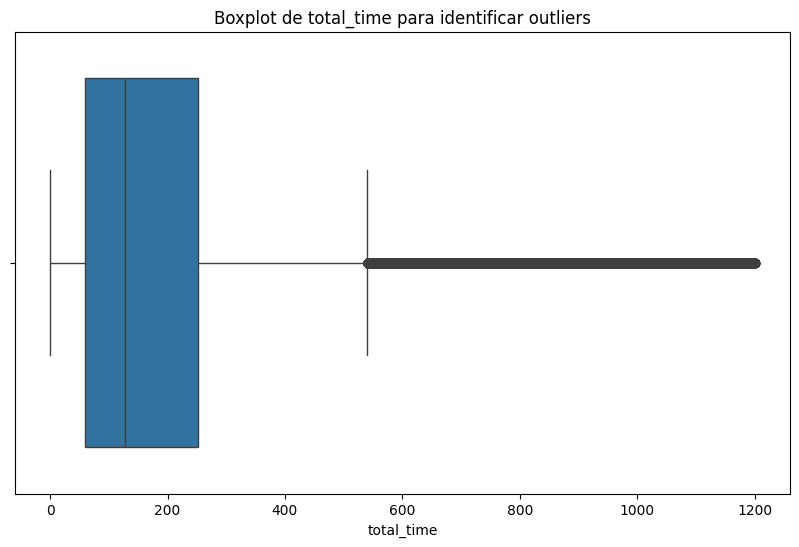

In [68]:
# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_time'])
plt.title('Boxplot de total_time para identificar outliers')
plt.show()

In [69]:
df['total_time'].describe()

count    436417.000000
mean        188.919788
std         193.338928
min           0.000000
25%          60.000000
50%         127.000000
75%         252.000000
max        1200.000000
Name: total_time, dtype: float64

In [70]:

df.to_csv('CC99_DataSet.csv', index=False)
